# Modelos TFG 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [69]:
df_modelos = pd.read_csv("../data/datosFinales/df_modelos.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.contains('diferencia', case=False)]
categoricas = pd.read_csv("../data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [70]:
df_modelos.shape

(728, 141)

In [71]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [72]:
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_5')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_4')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_3')]

df_modelos

,id_registro,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,...,temp_corp_2,pcr_2,plaquetas_2,leucocitos_2,tad_2,tas_2,creatinina_2,frec_resp_2,eva_2,frec_card_2
0,92-1,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,...,36.6,207.00,11.877576,9.043223,85.0,150.0,0.72,24.0,6.0,92.0
1,92-2,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,...,36.4,141.70,11.751950,8.955577,55.0,115.0,1.24,23.0,3.0,73.0
2,92-3,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,...,35.5,126.40,11.736077,9.068892,65.0,106.0,0.71,22.0,2.0,60.0
3,92-4,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,...,36.0,155.40,11.884496,9.457279,60.0,100.0,0.43,22.0,3.0,100.0
4,92-5,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,...,35.8,414.90,12.546114,8.304247,65.0,126.0,0.62,18.0,4.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,613-30,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,...,37.8,7.89,12.089544,9.923339,89.0,134.0,1.04,29.0,4.0,103.0
724,613-31,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,...,37.2,9.06,12.043560,8.801018,76.0,123.0,0.52,24.0,5.0,88.0
725,613-32,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,...,37.0,7.89,12.323860,8.969669,69.0,139.0,0.57,26.0,2.0,78.0
726,617-1,0.0,74.0,53.0,160.0,20.7,0.0,6.0,2.0,2.0,...,37.1,272.00,11.635152,8.684570,87.0,134.0,0.42,15.0,5.0,89.0


In [73]:
for col in df_modelos.columns:
    print(col)

id_registro
sexo
edad
peso
talla
imc
neoadyuvancia
localizacion
tipo_histologico
ct
cn
cm
ecog
asa
dm
hta
cardiopatia
nefropatia
alcohol
fumador
neumopatia
enf_vasc_cer
enf_art_peri
demencia
esteroides
datos_basales_complete
vol_diuresis_dia
hemoglobina
perioperatorio_complete
acondicionamienio
tipo_cirugia
abordaje
perdida_sang
anastomosis
tipo_anastomosis
piloro
icg
intervencin_complete
fuga
proteinas_0
quick_0
linfocitos_0
sat_oxig_0
albumina_0
il6_0
neutrofilos_0
temp_corp_0
pcr_0
plaquetas_0
leucocitos_0
tad_0
tas_0
creatinina_0
frec_resp_0
eva_0
frec_card_0
proteinas_1
quick_1
linfocitos_1
sat_oxig_1
albumina_1
il6_1
neutrofilos_1
temp_corp_1
pcr_1
plaquetas_1
leucocitos_1
tad_1
tas_1
creatinina_1
frec_resp_1
eva_1
frec_card_1
proteinas_2
quick_2
linfocitos_2
sat_oxig_2
albumina_2
il6_2
neutrofilos_2
temp_corp_2
pcr_2
plaquetas_2
leucocitos_2
tad_2
tas_2
creatinina_2
frec_resp_2
eva_2
frec_card_2


## Modelos

In [74]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [75]:
df_tmp = df_modelos.copy().drop('id_registro', axis=1, errors='ignore')
df_tmp = df_tmp.copy()[df_modelos['fuga'] != -1]

# encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# # Ajustar y transformar las columnas categóricas
# X_cat_encoded = encoder.fit_transform(df_tmp[categoricas])

# # Crear DataFrame con los nuevos nombres de columnas
# cat_encoded_df = pd.DataFrame(
#     X_cat_encoded,
#     columns=encoder.get_feature_names_out(categoricas),
#     index=df_tmp.index  # mantener los índices originales
# )

# # Concatenar con el resto de columnas no categóricas
# X_encoded = pd.concat([df_tmp.drop(columns=categoricas), cat_encoded_df], axis=1).drop(columns='fuga')
y = df_tmp['fuga']
X = df_tmp.drop(columns='fuga')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [76]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut


param_grid = {
    'max_iter': [100],
    'learning_rate': [0.5, 0.8, 0.9, 1],
    'max_depth': [1, 2],
    'min_samples_leaf': [1, 2, 3, 4],
    'early_stopping': [True],
    'l2_regularization': [0.6, 0.7, 0.8, 1],
    'class_weight': ['balanced', None]
}
modelo_hgb = HistGradientBoostingClassifier(random_state=14)
# Use RandomizedSearchCV for a more efficient search
#grid_search = GridSearchCV(modelo_hgb, param_grid, cv=LeaveOneOut(), n_jobs=-1)
#grid_search.fit(X_train, y_train)

In [77]:
print("Mejores hiperparámetros:")
print("max_iter: 1000")
print("learning_rate: ", grid_search.best_params_['learning_rate'])
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("early_stopping: ", grid_search.best_params_['early_stopping'])
print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
print("class_weight: ", grid_search.best_params_['class_weight'])
print("Mejor puntuación:")
print(grid_search.best_score_)


Mejores hiperparámetros:
max_iter: 1000
learning_rate:  0.5
max_depth:  1
min_samples_leaf:  3
early_stopping:  True
l2_regularization:  0.7
class_weight:  None
Mejor puntuación:
0.7974683544303798


In [78]:
#create a model with the best hyperparameters
from sklearn.ensemble import HistGradientBoostingClassifier
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=1000,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=grid_search.best_params_['l2_regularization'],  # Regularización L2
    class_weight=None, # Balancear clases
    random_state=14
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
f1_train = f1_score(y_train, y_pred_train)
print("F1 score (train):", f1_train)


print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
f1_test = f1_score(y_test, y_pred)
print("F1 score (test):", f1_test)

Matriz de confusión con train
[[381   1]
 [ 73  19]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       382
           1       0.95      0.21      0.34        92

    accuracy                           0.84       474
   macro avg       0.89      0.60      0.63       474
weighted avg       0.86      0.84      0.80       474

Accuracy: 0.8438818565400844
AUC: 0.852478374687002
F1 score (train): 0.3392857142857143


Matriz de confusión con test
[[157   8]
 [ 35   4]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       165
           1       0.33      0.10      0.16        39

    accuracy                           0.79       204
   macro avg       0.58      0.53      0.52       204
weighted avg       0.73      0.79      0.74       204

Accuracy: 0.7892156862745098
AUC: 0.6443667443667443
F1 score (test): 0.1568627450980392


In [79]:
modelo_hgb

HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.7,
                               learning_rate=0.5, max_depth=1, max_iter=1000,
                               min_samples_leaf=3, random_state=14,
                               scoring='roc_auc')

In [80]:
# grid search
# modelo con selection 
# busqueda del modelo, punto vista modelo y medico



In [81]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X, y)
vi = exp.model_parts()
vi.plot(max_vars=20)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-20:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 88 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x14ebc8700> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0142, mean = 0.202, max = 0.748
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.714, mean = -0.00838, max = 0.954
  -> model_info        : package sklearn

A new explainer has been created!


In [82]:
for im in imps:
    if im not in X.columns:
        imps.remove(im)

imps


['eva_2',
 'eva_1',
 'eva_0',
 'albumina_0',
 'albumina_1',
 'abordaje',
 'tad_1',
 'plaquetas_1',
 'pcr_1',
 'neutrofilos_2',
 'pcr_0',
 'cardiopatia',
 'tas_0',
 'temp_corp_1',
 'frec_card_1',
 'perdida_sang',
 'linfocitos_1',
 'pcr_2',
 'localizacion']

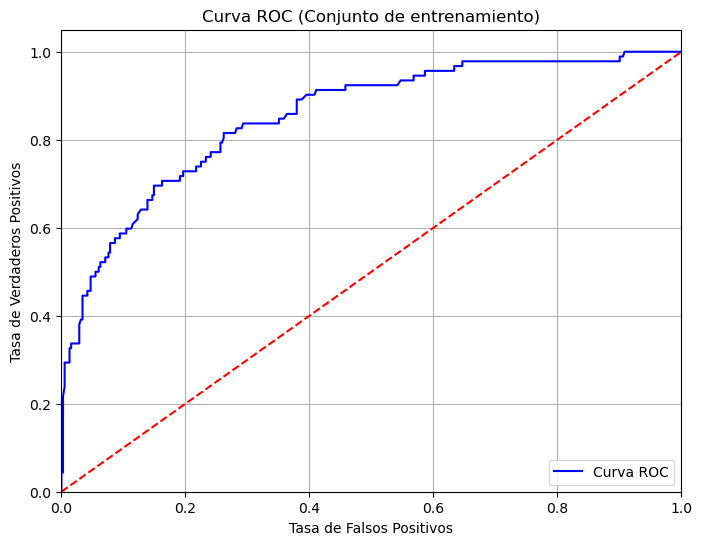

In [83]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

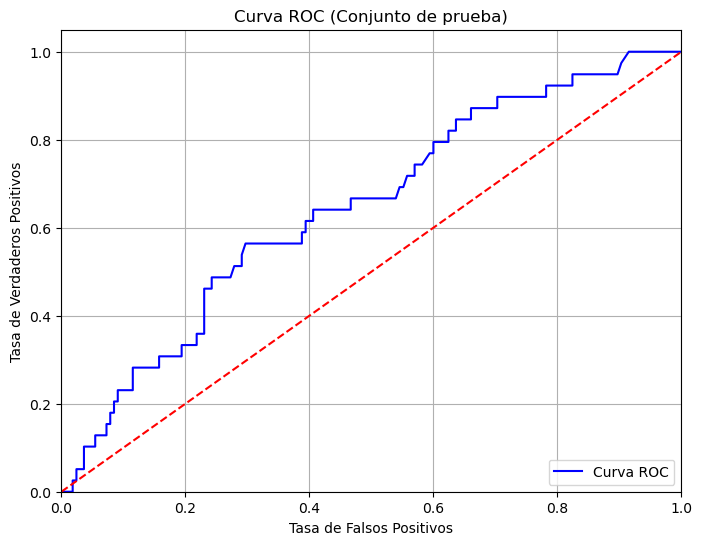

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()